In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
import re
from bs4 import BeautifulSoup
import nltk
from nltk.corpus import wordnet
from nltk.stem import PorterStemmer, WordNetLemmatizer

# Download necessary NLTK data
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')

import warnings
warnings.filterwarnings('ignore')

C:\Users\DELL\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [2]:
df=pd.read_csv('train.csv')
df.head()

id  qid1  qid2                                          question1  \
0   0     1     2  What is the step by step guide to invest in sh...   
1   1     3     4  What is the story of Kohinoor (Koh-i-Noor) Dia...   
2   2     5     6  How can I increase the speed of my internet co...   
3   3     7     8  Why am I mentally very lonely? How can I solve...   
4   4     9    10  Which one dissolve in water quikly sugar, salt...   

                                           question2  is_duplicate  
0  What is the step by step guide to invest in sh...             0  
1  What would happen if the Indian government sto...             0  
2  How can Internet speed be increased by hacking...             0  
3  Find the remainder when [math]23^{24}[/math] i...             0  
4            Which fish would survive in salt water?             0

In [3]:
new_df=df.sample(30000,random_state=2024)
new_df.head()

id    qid1    qid2  \
222350  222350  194188    5241   
191391  191391  290713   26465   
281860  281860  401688  401689   
301900  301900  419339  424862   
29083    29083   53851   53852   

                                                question1  \
222350      What is the best thing to learn any language?   
191391  Is there anything wrong with masturbating and ...   
281860  What role does continental deflection play in ...   
301900         Why does K-pop favor feminine looking men?   
29083          Which is the best tour provider in Kerala?   

                                                question2  is_duplicate  
222350  How do I quickly and efficiently learn a new l...             0  
191391  Do people masturbate or watch porn? If so, how...             0  
281860     How does the number 10 play a role in science?             0  
301900  Are most women attracted to men with overly ma...             0  
29083   Which is the best Kerala Tour operator for Ker...             1

In [4]:
def get_wordnet_pos(word):
    """Map POS tag to first character lemmatize() accepts"""
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}
    return tag_dict.get(tag, wordnet.NOUN)


In [5]:
def preprocess(q):
    # Initialize stemmer and lemmatizer
    stemmer = PorterStemmer()
    lemmatizer = WordNetLemmatizer()

    
    q = str(q).lower().strip()
    
    # Replace certain special characters with their string equivalents
    q = q.replace('%', ' percent')
    q = q.replace('$', ' dollar ')
    q = q.replace('₹', ' rupee ')
    q = q.replace('€', ' euro ')
    q = q.replace('@', ' at ')
    
    # The pattern '[math]' appears around 900 times in the whole dataset.
    q = q.replace('[math]', '')
    
    # Replacing some numbers with string equivalents (not perfect, can be done better to account for more cases)
    q = q.replace(',000,000,000 ', 'b ')
    q = q.replace(',000,000 ', 'm ')
    q = q.replace(',000 ', 'k ')
    q = re.sub(r'([0-9]+)000000000', r'\1b', q)
    q = re.sub(r'([0-9]+)000000', r'\1m', q)
    q = re.sub(r'([0-9]+)000', r'\1k', q)
    
    # Decontracting words
    # https://en.wikipedia.org/wiki/Wikipedia%3aList_of_English_contractions
    # https://stackoverflow.com/a/19794953
    contractions = { 
    "ain't": "am not",
    "aren't": "are not",
    "can't": "can not",
    "can't've": "can not have",
    "'cause": "because",
    "could've": "could have",
    "couldn't": "could not",
    "couldn't've": "could not have",
    "didn't": "did not",
    "doesn't": "does not",
    "don't": "do not",
    "hadn't": "had not",
    "hadn't've": "had not have",
    "hasn't": "has not",
    "haven't": "have not",
    "he'd": "he would",
    "he'd've": "he would have",
    "he'll": "he will",
    "he'll've": "he will have",
    "he's": "he is",
    "how'd": "how did",
    "how'd'y": "how do you",
    "how'll": "how will",
    "how's": "how is",
    "i'd": "i would",
    "i'd've": "i would have",
    "i'll": "i will",
    "i'll've": "i will have",
    "i'm": "i am",
    "i've": "i have",
    "isn't": "is not",
    "it'd": "it would",
    "it'd've": "it would have",
    "it'll": "it will",
    "it'll've": "it will have",
    "it's": "it is",
    "let's": "let us",
    "ma'am": "madam",
    "mayn't": "may not",
    "might've": "might have",
    "mightn't": "might not",
    "mightn't've": "might not have",
    "must've": "must have",
    "mustn't": "must not",
    "mustn't've": "must not have",
    "needn't": "need not",
    "needn't've": "need not have",
    "o'clock": "of the clock",
    "oughtn't": "ought not",
    "oughtn't've": "ought not have",
    "shan't": "shall not",
    "sha'n't": "shall not",
    "shan't've": "shall not have",
    "she'd": "she would",
    "she'd've": "she would have",
    "she'll": "she will",
    "she'll've": "she will have",
    "she's": "she is",
    "should've": "should have",
    "shouldn't": "should not",
    "shouldn't've": "should not have",
    "so've": "so have",
    "so's": "so as",
    "that'd": "that would",
    "that'd've": "that would have",
    "that's": "that is",
    "there'd": "there would",
    "there'd've": "there would have",
    "there's": "there is",
    "they'd": "they would",
    "they'd've": "they would have",
    "they'll": "they will",
    "they'll've": "they will have",
    "they're": "they are",
    "they've": "they have",
    "to've": "to have",
    "wasn't": "was not",
    "we'd": "we would",
    "we'd've": "we would have",
    "we'll": "we will",
    "we'll've": "we will have",
    "we're": "we are",
    "we've": "we have",
    "weren't": "were not",
    "what'll": "what will",
    "what'll've": "what will have",
    "what're": "what are",
    "what's": "what is",
    "what've": "what have",
    "when's": "when is",
    "when've": "when have",
    "where'd": "where did",
    "where's": "where is",
    "where've": "where have",
    "who'll": "who will",
    "who'll've": "who will have",
    "who's": "who is",
    "who've": "who have",
    "why's": "why is",
    "why've": "why have",
    "will've": "will have",
    "won't": "will not",
    "won't've": "will not have",
    "would've": "would have",
    "wouldn't": "would not",
    "wouldn't've": "would not have",
    "y'all": "you all",
    "y'all'd": "you all would",
    "y'all'd've": "you all would have",
    "y'all're": "you all are",
    "y'all've": "you all have",
    "you'd": "you would",
    "you'd've": "you would have",
    "you'll": "you will",
    "you'll've": "you will have",
    "you're": "you are",
    "you've": "you have"
    }

    q_decontracted = []

    for word in q.split():
        if word in contractions:
            word = contractions[word]

        q_decontracted.append(word)

    q = ' '.join(q_decontracted)
    q = q.replace("'ve", " have")
    q = q.replace("n't", " not")
    q = q.replace("'re", " are")
    q = q.replace("'ll", " will")
    
    # Removing HTML tags
    q = BeautifulSoup(q)
    q = q.get_text()
    
    # Remove punctuations
    pattern = re.compile('\W')
    q = re.sub(pattern, ' ', q).strip()

    # Stemming
    q_stemmed = [stemmer.stem(word) for word in q.split()]
    q = ' '.join(q_stemmed)
    
    # Lemmatization
    q_lemmatized = [lemmatizer.lemmatize(word, get_wordnet_pos(word)) for word in q.split()]
    q = ' '.join(q_lemmatized)

    return q
   

In [6]:
preprocess(" i've already! wasn't <b>done</b>?")

'i have alreadi wa not do'

In [7]:
new_df['question1']=new_df['question1'].apply(preprocess)
new_df['question2']=new_df['question1'].apply(preprocess)



In [8]:
new_df.head()

id    qid1    qid2  \
222350  222350  194188    5241   
191391  191391  290713   26465   
281860  281860  401688  401689   
301900  301900  419339  424862   
29083    29083   53851   53852   

                                                question1  \
222350        what be the best thing to learn ani languag   
191391  be there anyth wrong with masturb and watch po...   
281860  what role doe continent deflect play in ocean ...   
301900               whi doe k pop favor feminin look men   
29083             which be the best tour provid in kerala   

                                                question2  is_duplicate  
222350        what be the best thing to learn ani languag             0  
191391  be there anyth wrong with masturb and watch po...             0  
281860  what role doe contin deflect play in ocean cur...             0  
301900               whi doe k pop favor feminin look men             0  
29083             which be the best tour provid in kerala             1

In [9]:
new_df['q1_len']=new_df['question1'].str.len()
new_df['q2_len']=new_df['question2'].str.len()

In [10]:
new_df['q1_num_words']=new_df['question1'].apply(lambda row:len(row.split(" ")))
new_df['q2_num_words']=new_df['question2'].apply(lambda row:len(row.split(" ")))

In [11]:
new_df.head()

id    qid1    qid2  \
222350  222350  194188    5241   
191391  191391  290713   26465   
281860  281860  401688  401689   
301900  301900  419339  424862   
29083    29083   53851   53852   

                                                question1  \
222350        what be the best thing to learn ani languag   
191391  be there anyth wrong with masturb and watch po...   
281860  what role doe continent deflect play in ocean ...   
301900               whi doe k pop favor feminin look men   
29083             which be the best tour provid in kerala   

                                                question2  is_duplicate  \
222350        what be the best thing to learn ani languag             0   
191391  be there anyth wrong with masturb and watch po...             0   
281860  what role doe contin deflect play in ocean cur...             0   
301900               whi doe k pop favor feminin look men             0   
29083             which be the best tour provid in kerala             1   

        q1_len  q2_len  q1_num_words  q2_num_words  
222350      43      43             9             9  
191391      67      67            14            14  
281860      53      50             9             9  
301900      36      36             8             8  
29083       39      39             8             8

In [12]:
def common_word(row):
    w1=set(map(lambda word: word.lower().strip(),row['question1'].split(" ")))
    w2=set(map(lambda word: word.lower().strip(),row['question2'].split(" ")))
    return len(w1&w2)    

In [13]:
new_df['word_common']=new_df.apply(common_word,axis=1)
new_df.head()

id    qid1    qid2  \
222350  222350  194188    5241   
191391  191391  290713   26465   
281860  281860  401688  401689   
301900  301900  419339  424862   
29083    29083   53851   53852   

                                                question1  \
222350        what be the best thing to learn ani languag   
191391  be there anyth wrong with masturb and watch po...   
281860  what role doe continent deflect play in ocean ...   
301900               whi doe k pop favor feminin look men   
29083             which be the best tour provid in kerala   

                                                question2  is_duplicate  \
222350        what be the best thing to learn ani languag             0   
191391  be there anyth wrong with masturb and watch po...             0   
281860  what role doe contin deflect play in ocean cur...             0   
301900               whi doe k pop favor feminin look men             0   
29083             which be the best tour provid in kerala             1   

        q1_len  q2_len  q1_num_words  q2_num_words  word_common  
222350      43      43             9             9            9  
191391      67      67            14            14           13  
281860      53      50             9             9            8  
301900      36      36             8             8            8  
29083       39      39             8             8            8

In [14]:
def total_words(row):
    w1=set(map(lambda word: word.lower().strip(),row['question1'].split(" ")))
    w2=set(map(lambda word: word.lower().strip(),row['question2'].split(" "))) 
    return (len(w1)+len(w2))

In [15]:
new_df['word_total'] = new_df.apply(total_words,axis=1)
new_df.head()

id    qid1    qid2  \
222350  222350  194188    5241   
191391  191391  290713   26465   
281860  281860  401688  401689   
301900  301900  419339  424862   
29083    29083   53851   53852   

                                                question1  \
222350        what be the best thing to learn ani languag   
191391  be there anyth wrong with masturb and watch po...   
281860  what role doe continent deflect play in ocean ...   
301900               whi doe k pop favor feminin look men   
29083             which be the best tour provid in kerala   

                                                question2  is_duplicate  \
222350        what be the best thing to learn ani languag             0   
191391  be there anyth wrong with masturb and watch po...             0   
281860  what role doe contin deflect play in ocean cur...             0   
301900               whi doe k pop favor feminin look men             0   
29083             which be the best tour provid in kerala             1   

        q1_len  q2_len  q1_num_words  q2_num_words  word_common  word_total  
222350      43      43             9             9            9          18  
191391      67      67            14            14           13          26  
281860      53      50             9             9            8          18  
301900      36      36             8             8            8          16  
29083       39      39             8             8            8          16

In [16]:
new_df['word_share']= round(new_df['word_common']/new_df['word_total'],2)
new_df.head()

id    qid1    qid2  \
222350  222350  194188    5241   
191391  191391  290713   26465   
281860  281860  401688  401689   
301900  301900  419339  424862   
29083    29083   53851   53852   

                                                question1  \
222350        what be the best thing to learn ani languag   
191391  be there anyth wrong with masturb and watch po...   
281860  what role doe continent deflect play in ocean ...   
301900               whi doe k pop favor feminin look men   
29083             which be the best tour provid in kerala   

                                                question2  is_duplicate  \
222350        what be the best thing to learn ani languag             0   
191391  be there anyth wrong with masturb and watch po...             0   
281860  what role doe contin deflect play in ocean cur...             0   
301900               whi doe k pop favor feminin look men             0   
29083             which be the best tour provid in kerala             1   

        q1_len  q2_len  q1_num_words  q2_num_words  word_common  word_total  \
222350      43      43             9             9            9          18   
191391      67      67            14            14           13          26   
281860      53      50             9             9            8          18   
301900      36      36             8             8            8          16   
29083       39      39             8             8            8          16   

        word_share  
222350        0.50  
191391        0.50  
281860        0.44  
301900        0.50  
29083         0.50

minimum characters 0
maximum characters 302
average num of characters 53


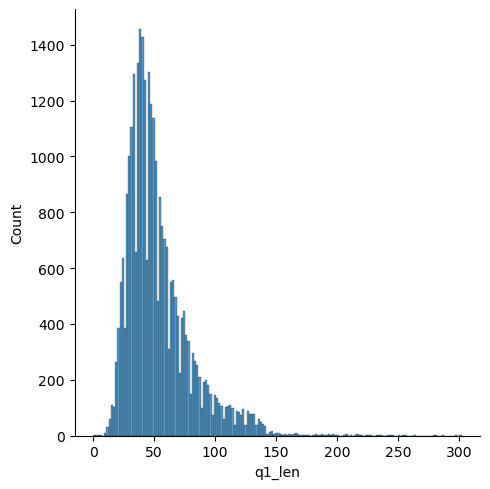

In [17]:
# Analysis of features
sns.displot(new_df['q1_len'])
print('minimum characters',new_df['q1_len'].min())
print('maximum characters',new_df['q1_len'].max())
print('average num of characters',int(new_df['q1_len'].mean()))

minimum characters 0
maximum characters 301
average num of characters 53


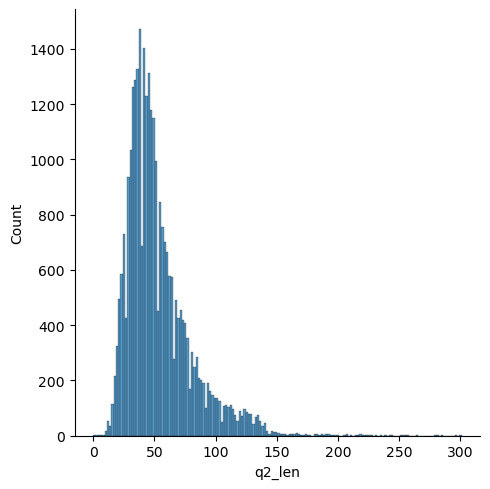

In [18]:
sns.displot(new_df['q2_len'])
print('minimum characters',new_df['q2_len'].min())
print('maximum characters',new_df['q2_len'].max())
print('average num of characters',int(new_df['q2_len'].mean()))


minimum words 1
maximum words 69
average num of words 11


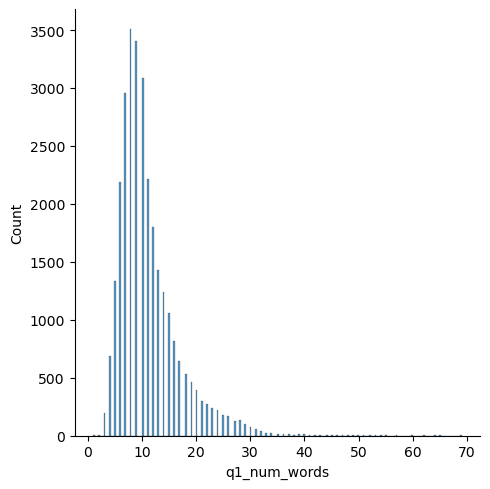

In [19]:
sns.displot(new_df['q1_num_words'])
print('minimum words',new_df['q1_num_words'].min())
print('maximum words',new_df['q1_num_words'].max())
print('average num of words',int(new_df['q1_num_words'].mean()))


minimum words 1
maximum words 69
average num of words 11


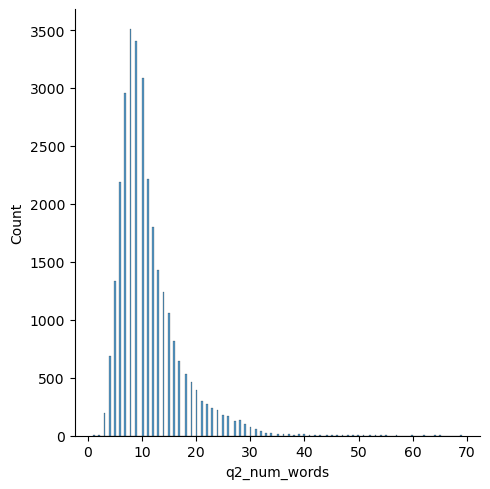

In [20]:
sns.displot(new_df['q2_num_words'])
print('minimum words',new_df['q2_num_words'].min())
print('maximum words',new_df['q2_num_words'].max())
print('average num of words',int(new_df['q2_num_words'].mean()))


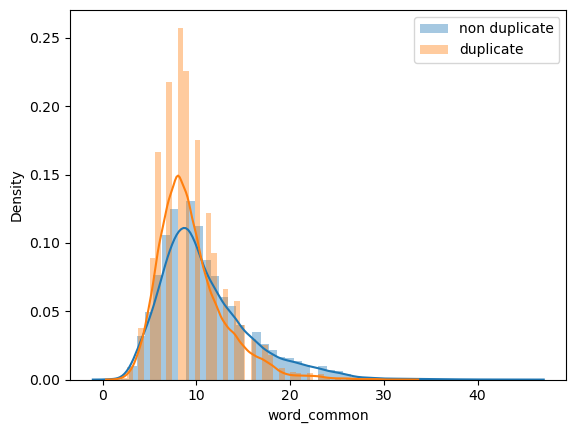

In [21]:
# common words
sns.distplot(new_df[new_df['is_duplicate'] == 0]['word_common'],label='non duplicate')
sns.distplot(new_df[new_df['is_duplicate'] == 1]['word_common'],label='duplicate')
plt.legend()
plt.show()


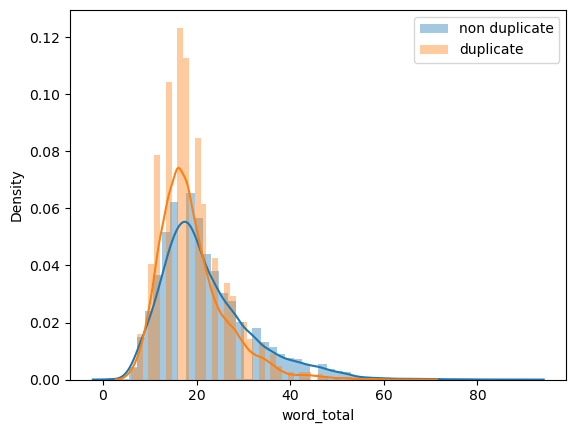

In [22]:
# total words
sns.distplot(new_df[new_df['is_duplicate'] == 0]['word_total'],label='non duplicate')
sns.distplot(new_df[new_df['is_duplicate'] == 1]['word_total'],label='duplicate')
plt.legend()
plt.show()


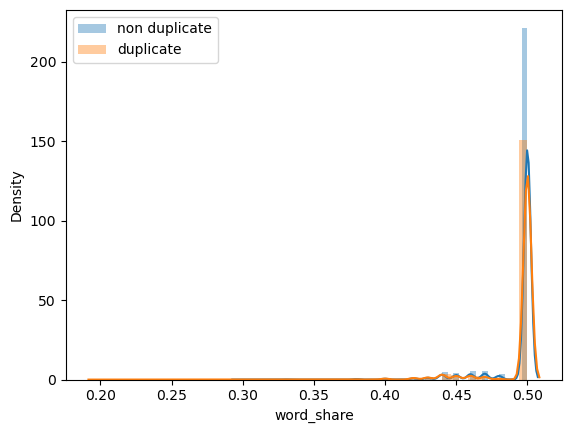

In [23]:
# word share
sns.distplot(new_df[new_df['is_duplicate'] == 0]['word_share'],label='non duplicate')
sns.distplot(new_df[new_df['is_duplicate'] == 1]['word_share'],label='duplicate')
plt.legend()
plt.show()


# Advanced Features
## 1. Token Features
* cwc_min: This is the ratio of the number of common words to the length of the smaller question
* cwc_max: This is the ratio of the number of common words to the length of the larger question
* csc_min: This is the ratio of the number of common stop words to the smaller stop word count among the two questions
* csc_max: This is the ratio of the number of common stop words to the larger stop word count among the two questions
* ctc_min: This is the ratio of the number of common tokens to the smaller token count among the two questions
* ctc_max: This is the ratio of the number of common tokens to the larger token count among the two questions
* last_word_eq: 1 if the last word in the two questions is same, 0 otherwise
* first_word_eq: 1 if the first word in the two questions is same, 0 otherwise
## 2. Length Based Features
* mean_len: Mean of the length of the two questions (number of words)
* abs_len_diff: Absolute difference between the length of the two questions (number of words)
* longest_substr_ratio: Ratio of the length of the longest substring among the two questions to the length of the smaller question
## 3. Fuzzy Features
* fuzz_ratio: fuzz_ratio score from fuzzywuzzy
* fuzz_partial_ratio: fuzz_partial_ratio from fuzzywuzzy
* token_sort_ratio: token_sort_ratio from fuzzywuzzy
* token_set_ratio: token_set_ratio from fuzzywuzzy


In [24]:
# Advanced Features 

from nltk.corpus import stopwords
# Ensure the stopwords are downloaded
nltk.download('stopwords')

def fetch_token_features(row):
    q1=row['question1']
    q2=row['question2']
    
    SAFE_DIV=0.0001
    
    STOP_WORDS=set(stopwords.words('english'))
    
    token_features =[0.0]*8
    
    #Converting the sentence into Tokens:
    q1_tokens=q1.split()
    q2_tokens=q2.split()
    
    if len(q1_tokens)==0 or len(q2_tokens)==0:
        return token_features
    
    
    #get the non-stops words in questions
    q1_words=set([word for word in q1_tokens if word not in STOP_WORDS])
    q2_words=set([word for word in q2_tokens if word not in STOP_WORDS])
    
    
    #get the stops word in questions
    
    q1_stops=set([word for word in q1_tokens if word  in STOP_WORDS])
    q2_stops=set([word for word in q2_tokens if word  in STOP_WORDS])
    
    # get common stopsword from question:
    common_word_count=len(q1_words.intersection(q2_words))
    
    common_stop_count=len(q1_stops.intersection(q2_stops))
    
    #get the common token from question
    common_token_count=len(set(q1_tokens).intersection(set(q2_tokens)))
    
    token_features[0]=common_word_count /(min(len(q1_words), len(q2_words)) + SAFE_DIV)
    token_features[1]=common_word_count /(max(len(q1_words), len(q2_words)) + SAFE_DIV)
    token_features[2]=common_stop_count /(min(len(q1_stops), len(q2_stops)) + SAFE_DIV)
    token_features[3]=common_stop_count /(max(len(q1_stops), len(q2_stops)) + SAFE_DIV)
    token_features[4]=common_token_count /(min(len(q1_tokens), len(q2_tokens)) + SAFE_DIV)
    token_features[5]=common_token_count /(max(len(q1_tokens), len(q2_tokens)) + SAFE_DIV)
    
    #last  word both question is same or not
    token_features[6]=int(q1_tokens[-1]==q2_tokens[-1])
    
    #first word of both question is same or not
    
    token_features[7]=int(q1_tokens[0]==q2_tokens[0])
    
    return token_features

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [25]:
token_features = new_df.apply(fetch_token_features,axis=1)

new_df['cwc_min'] = list(map(lambda x: x[0],token_features))
new_df['cwc_max'] = list(map(lambda x: x[1],token_features))
new_df['csc_min'] = list(map(lambda x: x[2],token_features))
new_df['csc_max'] = list(map(lambda x: x[3],token_features))
new_df['ctc_min'] = list(map(lambda x: x[4],token_features))
new_df['ctc_max'] = list(map(lambda x: x[5],token_features))
new_df['last_word_eq'] = list(map(lambda x: x[6],token_features))
new_df['first_word_eq'] = list(map(lambda x: x[7],token_features))

In [26]:
new_df.head()

id    qid1    qid2  \
222350  222350  194188    5241   
191391  191391  290713   26465   
281860  281860  401688  401689   
301900  301900  419339  424862   
29083    29083   53851   53852   

                                                question1  \
222350        what be the best thing to learn ani languag   
191391  be there anyth wrong with masturb and watch po...   
281860  what role doe continent deflect play in ocean ...   
301900               whi doe k pop favor feminin look men   
29083             which be the best tour provid in kerala   

                                                question2  is_duplicate  \
222350        what be the best thing to learn ani languag             0   
191391  be there anyth wrong with masturb and watch po...             0   
281860  what role doe contin deflect play in ocean cur...             0   
301900               whi doe k pop favor feminin look men             0   
29083             which be the best tour provid in kerala             1   

        q1_len  q2_len  q1_num_words  q2_num_words  ...  word_total  \
222350      43      43             9             9  ...          18   
191391      67      67            14            14  ...          26   
281860      53      50             9             9  ...          18   
301900      36      36             8             8  ...          16   
29083       39      39             8             8  ...          16   

        word_share   cwc_min   cwc_max   csc_min   csc_max   ctc_min  \
222350        0.50  0.999980  0.999980  0.999975  0.999975  0.999989   
191391        0.50  0.999983  0.999983  0.999986  0.999986  0.928565   
281860        0.44  0.857131  0.857131  0.999950  0.999950  0.888879   
301900        0.50  0.999988  0.999988  0.000000  0.000000  0.999988   
29083         0.50  0.999975  0.999975  0.999975  0.999975  0.999988   

         ctc_max  last_word_eq  first_word_eq  
222350  0.999989           1.0            1.0  
191391  0.928565           1.0            1.0  
281860  0.888879           1.0            1.0  
301900  0.999988           1.0            1.0  
29083   0.999988           1.0            1.0  

[5 rows x 21 columns]

In [27]:
import distance 
def fetch_lenght_features(row):
    q1=row['question1']
    q2=row['question2']
    
    lenght_features = [0.0]*3
    
    #converting the  sentences into tokens
    q1_tokens = q1.split()
    q2_tokens = q2.split()
    
    if len(q1_tokens)==0 or len(q2_tokens):
        return lenght_features
    
    # Absolute lenght features
    
    lenght_features[0] = abs(len(q1_tokens) - len(q2_tokens))
    
    #Average Token length of Both Question
    
    lenght_features[1] = (len(q1_tokens) + len(q2_tokens))/2
    
    strs = list(distance.lcsubstrings(q1,q2))
    lenght_features[2] = (len(strs[0]) /min(len(q1) ,len(q2)) +1)
    
    return lenght_features



In [28]:
#pip install distance

In [29]:
lenght_features=new_df.apply(fetch_lenght_features,axis=1)

new_df['abs_len_diff'] = list(map(lambda x: x[0],lenght_features))
new_df['mean_len'] = list(map(lambda x: x[1],lenght_features))
new_df['longest_substr_ratio'] = list(map(lambda x: x[2],lenght_features))

In [30]:
new_df.head()

id    qid1    qid2  \
222350  222350  194188    5241   
191391  191391  290713   26465   
281860  281860  401688  401689   
301900  301900  419339  424862   
29083    29083   53851   53852   

                                                question1  \
222350        what be the best thing to learn ani languag   
191391  be there anyth wrong with masturb and watch po...   
281860  what role doe continent deflect play in ocean ...   
301900               whi doe k pop favor feminin look men   
29083             which be the best tour provid in kerala   

                                                question2  is_duplicate  \
222350        what be the best thing to learn ani languag             0   
191391  be there anyth wrong with masturb and watch po...             0   
281860  what role doe contin deflect play in ocean cur...             0   
301900               whi doe k pop favor feminin look men             0   
29083             which be the best tour provid in kerala             1   

        q1_len  q2_len  q1_num_words  q2_num_words  ...   cwc_max   csc_min  \
222350      43      43             9             9  ...  0.999980  0.999975   
191391      67      67            14            14  ...  0.999983  0.999986   
281860      53      50             9             9  ...  0.857131  0.999950   
301900      36      36             8             8  ...  0.999988  0.000000   
29083       39      39             8             8  ...  0.999975  0.999975   

         csc_max   ctc_min   ctc_max  last_word_eq  first_word_eq  \
222350  0.999975  0.999989  0.999989           1.0            1.0   
191391  0.999986  0.928565  0.928565           1.0            1.0   
281860  0.999950  0.888879  0.888879           1.0            1.0   
301900  0.000000  0.999988  0.999988           1.0            1.0   
29083   0.999975  0.999988  0.999988           1.0            1.0   

        abs_len_diff  mean_len  longest_substr_ratio  
222350           0.0       0.0                   0.0  
191391           0.0       0.0                   0.0  
281860           0.0       0.0                   0.0  
301900           0.0       0.0                   0.0  
29083            0.0       0.0                   0.0  

[5 rows x 24 columns]

In [31]:
#pip install fuzzywuzzy

In [32]:
#fuzzy features 

from fuzzywuzzy import fuzz

def fetch_fuzzy_features(row):
    q1=row['question1']
    q2=row['question2']
    
    fuzzy_features = [0.0]*4
    
    # fuzz_ratio
    fuzzy_features[0]=fuzz.QRatio(q1,q2)
    
    # fuzz_partial_ratio
    fuzzy_features[1]=fuzz.partial_ratio(q1,q2)
    
    # token_sort_ratio
    fuzzy_features[2]=fuzz.token_sort_ratio(q1,q2)
    
    # token_set_ratio
    fuzzy_features[3]=fuzz.token_set_ratio(q1,q2)
    
    return fuzzy_features
    

    

In [33]:
fuzzy_features = new_df.apply(fetch_fuzzy_features,axis=1)

#Creating new feature columns for fuzzy features

new_df['fuzz_ratio']= list(map(lambda x: x[0],fuzzy_features))
new_df['fuzz_partial_ratio']= list(map(lambda x: x[1],fuzzy_features))
new_df['token_sort_ratio']= list(map(lambda x: x[2],fuzzy_features))
new_df['token_set_ratio']= list(map(lambda x: x[3],fuzzy_features))


In [34]:
print(new_df.shape)
new_df.head()

(30000, 28)


id    qid1    qid2  \
222350  222350  194188    5241   
191391  191391  290713   26465   
281860  281860  401688  401689   
301900  301900  419339  424862   
29083    29083   53851   53852   

                                                question1  \
222350        what be the best thing to learn ani languag   
191391  be there anyth wrong with masturb and watch po...   
281860  what role doe continent deflect play in ocean ...   
301900               whi doe k pop favor feminin look men   
29083             which be the best tour provid in kerala   

                                                question2  is_duplicate  \
222350        what be the best thing to learn ani languag             0   
191391  be there anyth wrong with masturb and watch po...             0   
281860  what role doe contin deflect play in ocean cur...             0   
301900               whi doe k pop favor feminin look men             0   
29083             which be the best tour provid in kerala             1   

        q1_len  q2_len  q1_num_words  q2_num_words  ...   ctc_max  \
222350      43      43             9             9  ...  0.999989   
191391      67      67            14            14  ...  0.928565   
281860      53      50             9             9  ...  0.888879   
301900      36      36             8             8  ...  0.999988   
29083       39      39             8             8  ...  0.999988   

        last_word_eq  first_word_eq  abs_len_diff  mean_len  \
222350           1.0            1.0           0.0       0.0   
191391           1.0            1.0           0.0       0.0   
281860           1.0            1.0           0.0       0.0   
301900           1.0            1.0           0.0       0.0   
29083            1.0            1.0           0.0       0.0   

        longest_substr_ratio  fuzz_ratio  fuzz_partial_ratio  \
222350                   0.0         100                 100   
191391                   0.0         100                 100   
281860                   0.0          97                  94   
301900                   0.0         100                 100   
29083                    0.0         100                 100   

        token_sort_ratio  token_set_ratio  
222350               100              100  
191391               100              100  
281860                97               97  
301900               100              100  
29083                100              100  

[5 rows x 28 columns]

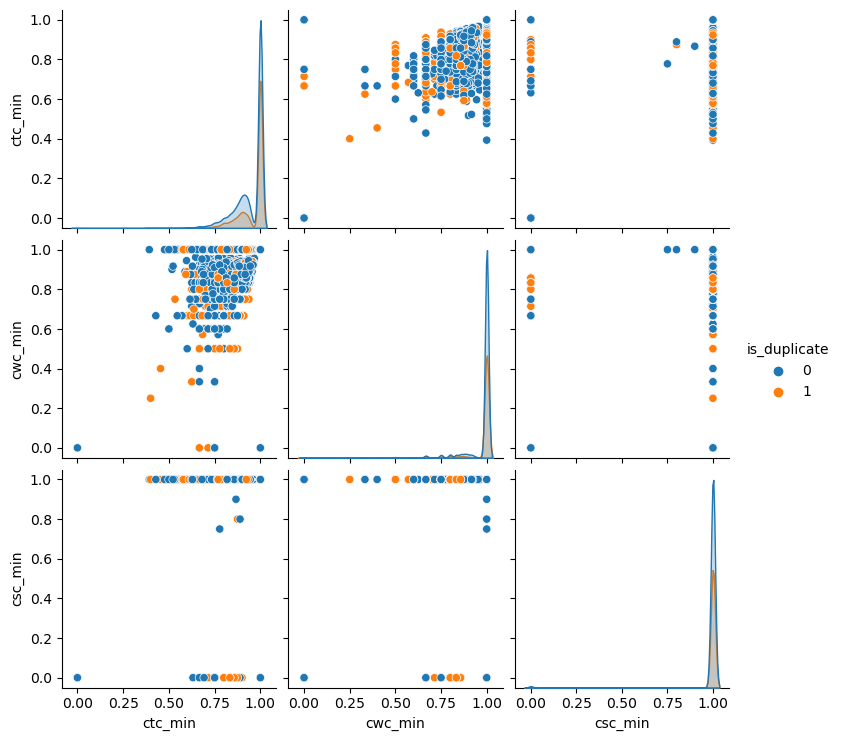

In [35]:
sns.pairplot(new_df[['ctc_min','cwc_min','csc_min','is_duplicate']],hue='is_duplicate')

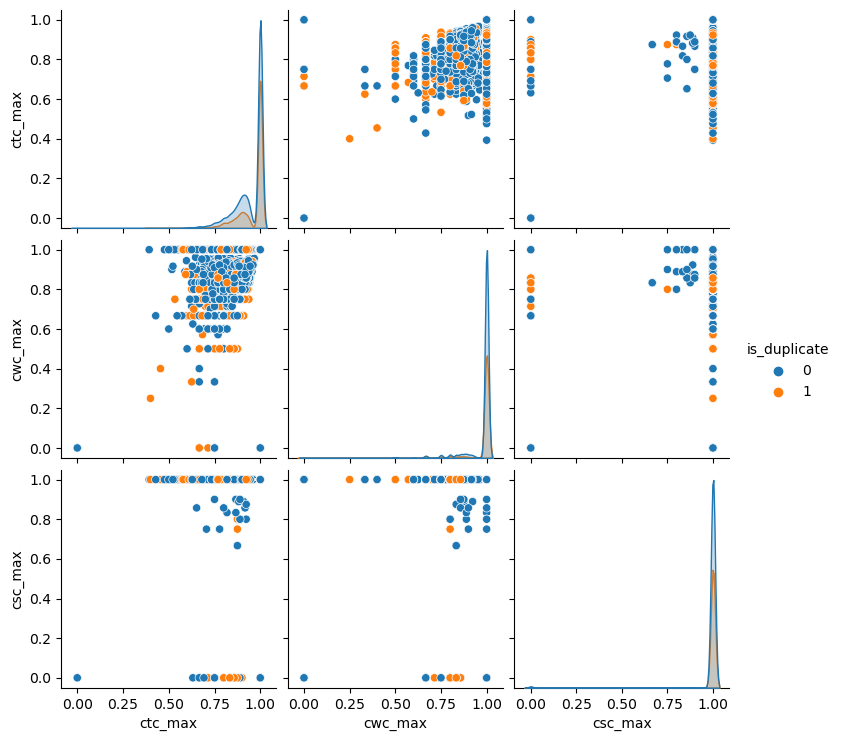

In [36]:
sns.pairplot(new_df[['ctc_max','cwc_max','csc_max','is_duplicate']],hue='is_duplicate')

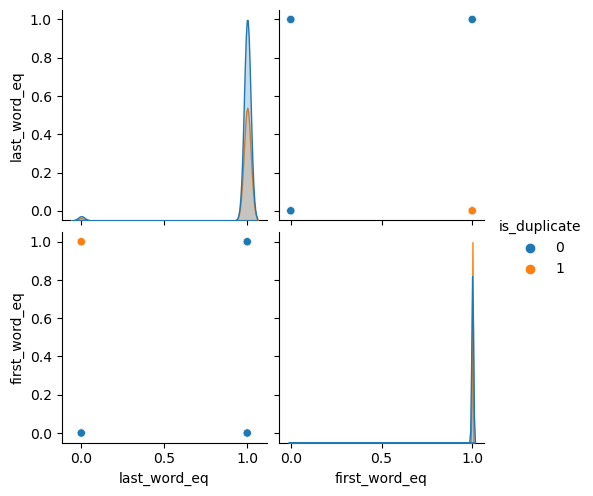

In [37]:
sns.pairplot(new_df[['last_word_eq','first_word_eq','is_duplicate']],hue='is_duplicate')

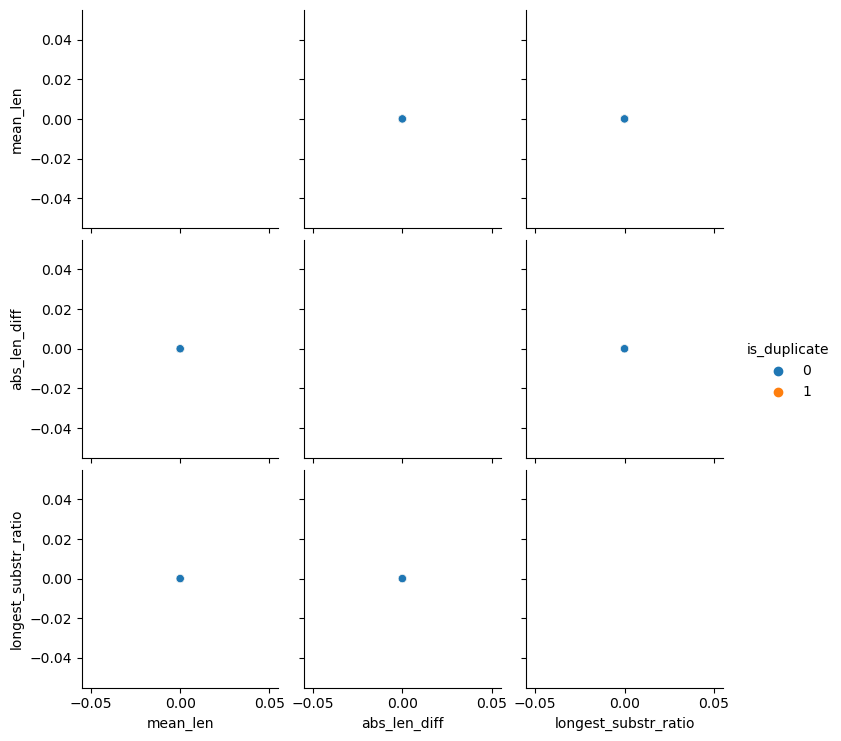

In [38]:
sns.pairplot(new_df[['mean_len','abs_len_diff','longest_substr_ratio','is_duplicate']],hue='is_duplicate')

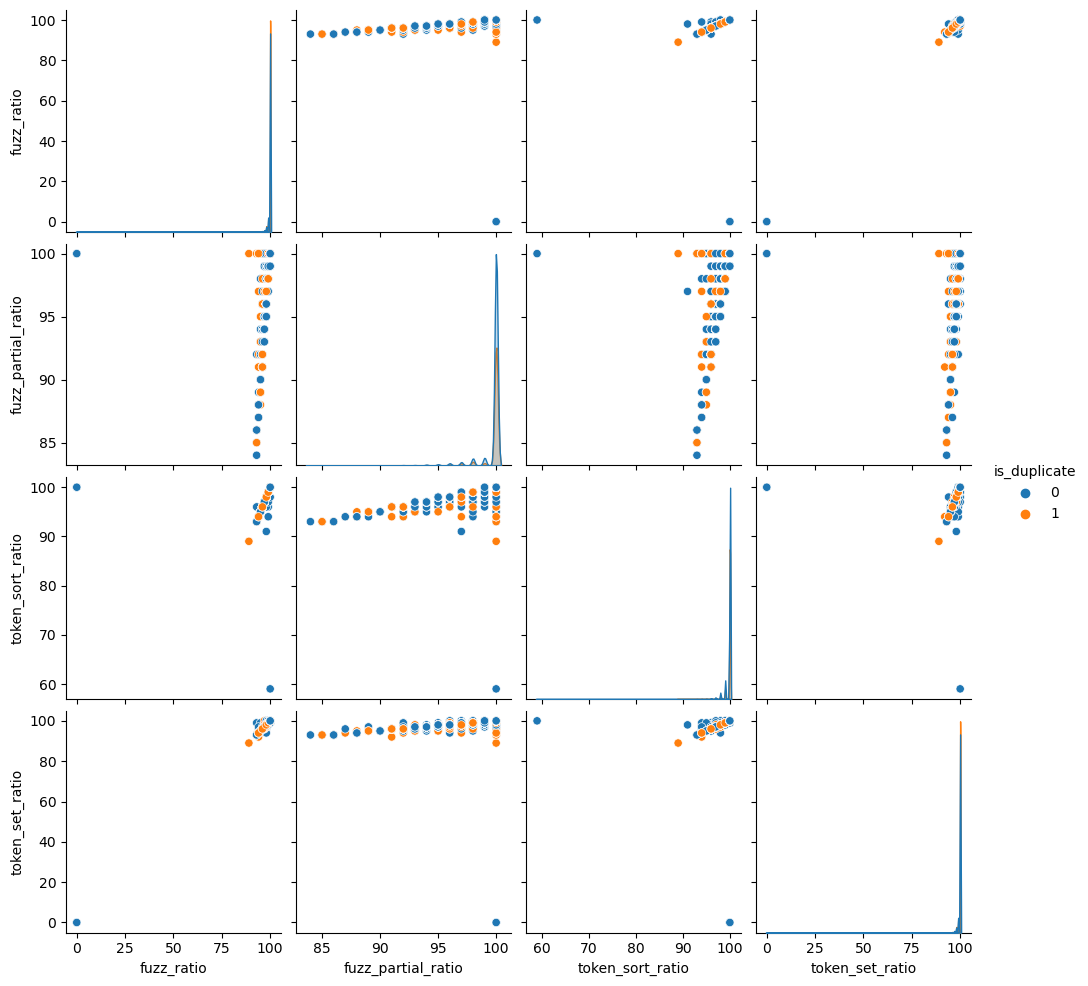

In [39]:
sns.pairplot(new_df[['fuzz_ratio','fuzz_partial_ratio','token_sort_ratio','token_set_ratio','is_duplicate']],hue='is_duplicate')

In [40]:
#Using TSNE for dimensionality reduction for 15 features (Generated after cleaning)

from sklearn.preprocessing import MinMaxScaler
x=MinMaxScaler().fit_transform(new_df[['cwc_min','cwc_max','csc_min','csc_max','ctc_min','ctc_max','last_word_eq',
                                       'first_word_eq','mean_len','abs_len_diff','longest_substr_ratio','fuzz_ratio',
                                       'fuzz_partial_ratio','token_sort_ratio','token_set_ratio']])
y=new_df['is_duplicate'].values

In [41]:
from sklearn.manifold import TSNE
tsne2d= TSNE(
    n_components=2,
    init='random', # pca
    random_state=101,
    method='barnes_hut',
    n_iter=1000,
    verbose=2,
    angle=0.5
).fit_transform(x)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 30000 samples in 0.172s...
[t-SNE] Computed neighbors for 30000 samples in 7.859s...
[t-SNE] Computed conditional probabilities for sample 1000 / 30000
[t-SNE] Computed conditional probabilities for sample 2000 / 30000
[t-SNE] Computed conditional probabilities for sample 3000 / 30000
[t-SNE] Computed conditional probabilities for sample 4000 / 30000
[t-SNE] Computed conditional probabilities for sample 5000 / 30000
[t-SNE] Computed conditional probabilities for sample 6000 / 30000
[t-SNE] Computed conditional probabilities for sample 7000 / 30000
[t-SNE] Computed conditional probabilities for sample 8000 / 30000
[t-SNE] Computed conditional probabilities for sample 9000 / 30000
[t-SNE] Computed conditional probabilities for sample 10000 / 30000
[t-SNE] Computed conditional probabilities for sample 11000 / 30000
[t-SNE] Computed conditional probabilities for sample 12000 / 30000
[t-SNE] Computed conditional probabilities for sam

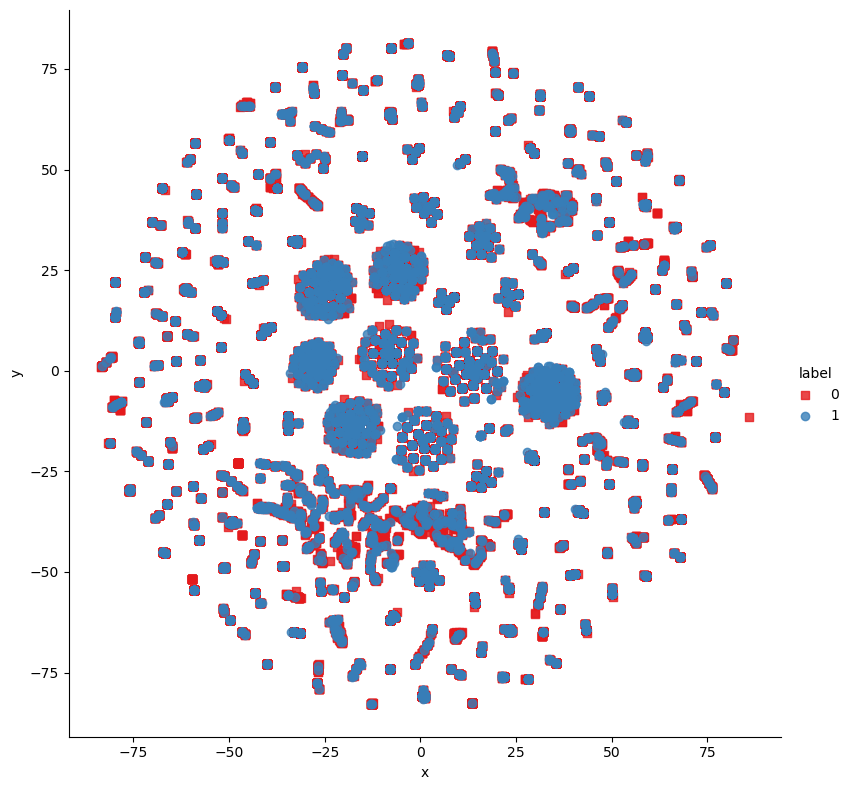

In [42]:
x_df =pd.DataFrame({'x': tsne2d[:,0],'y': tsne2d[:,1],'label':y})
#draw the plot in appropriate place in grid
sns.lmplot(data=x_df,x='x',y='y',hue='label',fit_reg=False,size=8,palette="Set1",markers=['s','o'])


In [43]:
tsne3d= TSNE(
    n_components=3,
    init='random', # pca
    random_state=101,
    method='barnes_hut',
    n_iter=1000,
    verbose=2,
    angle=0.5
).fit_transform(x)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 30000 samples in 0.300s...
[t-SNE] Computed neighbors for 30000 samples in 11.194s...
[t-SNE] Computed conditional probabilities for sample 1000 / 30000
[t-SNE] Computed conditional probabilities for sample 2000 / 30000
[t-SNE] Computed conditional probabilities for sample 3000 / 30000
[t-SNE] Computed conditional probabilities for sample 4000 / 30000
[t-SNE] Computed conditional probabilities for sample 5000 / 30000
[t-SNE] Computed conditional probabilities for sample 6000 / 30000
[t-SNE] Computed conditional probabilities for sample 7000 / 30000
[t-SNE] Computed conditional probabilities for sample 8000 / 30000
[t-SNE] Computed conditional probabilities for sample 9000 / 30000
[t-SNE] Computed conditional probabilities for sample 10000 / 30000
[t-SNE] Computed conditional probabilities for sample 11000 / 30000
[t-SNE] Computed conditional probabilities for sample 12000 / 30000
[t-SNE] Computed conditional probabilities for sa

In [44]:
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.offline as py
py.init_notebook_mode(connected=True)

trace1=go.Scatter3d(
    x=tsne3d[:,0],
    y=tsne3d[:,1],
    z=tsne3d[:,2],
    mode='markers',
    marker=dict(
    sizemode='diameter',
    color=y,
    colorscale='Portland',
    colorbar=dict(title='duplicate') ,   
    line=dict(color='rgb(255,255,255)'),
    opacity=0.75
    )
)

data=[trace1]
layout=dict(height=800,width=800,title='3d embebding with engineered features')
fig=dict(data=data,layout=layout)
py.iplot(fig,filename='3DBubble')

In [45]:
ques_df=new_df[['question1','question2']]
ques_df.head()

question1  \
222350        what be the best thing to learn ani languag   
191391  be there anyth wrong with masturb and watch po...   
281860  what role doe continent deflect play in ocean ...   
301900               whi doe k pop favor feminin look men   
29083             which be the best tour provid in kerala   

                                                question2  
222350        what be the best thing to learn ani languag  
191391  be there anyth wrong with masturb and watch po...  
281860  what role doe contin deflect play in ocean cur...  
301900               whi doe k pop favor feminin look men  
29083             which be the best tour provid in kerala

In [46]:
final_df=new_df.drop(columns=['id','qid1','qid2','question1','question2'])
print(final_df.shape)
final_df.head()

(30000, 23)


is_duplicate  q1_len  q2_len  q1_num_words  q2_num_words  word_common  \
222350             0      43      43             9             9            9   
191391             0      67      67            14            14           13   
281860             0      53      50             9             9            8   
301900             0      36      36             8             8            8   
29083              1      39      39             8             8            8   

        word_total  word_share   cwc_min   cwc_max  ...   ctc_max  \
222350          18        0.50  0.999980  0.999980  ...  0.999989   
191391          26        0.50  0.999983  0.999983  ...  0.928565   
281860          18        0.44  0.857131  0.857131  ...  0.888879   
301900          16        0.50  0.999988  0.999988  ...  0.999988   
29083           16        0.50  0.999975  0.999975  ...  0.999988   

        last_word_eq  first_word_eq  abs_len_diff  mean_len  \
222350           1.0            1.0           0.0       0.0   
191391           1.0            1.0           0.0       0.0   
281860           1.0            1.0           0.0       0.0   
301900           1.0            1.0           0.0       0.0   
29083            1.0            1.0           0.0       0.0   

        longest_substr_ratio  fuzz_ratio  fuzz_partial_ratio  \
222350                   0.0         100                 100   
191391                   0.0         100                 100   
281860                   0.0          97                  94   
301900                   0.0         100                 100   
29083                    0.0         100                 100   

        token_sort_ratio  token_set_ratio  
222350               100              100  
191391               100              100  
281860                97               97  
301900               100              100  
29083                100              100  

[5 rows x 23 columns]

In [47]:
from sklearn.feature_extraction.text import CountVectorizer
#merge texts
questions=list(ques_df['question1'])+list(ques_df['question2'])

cv=CountVectorizer(max_features=3000)
q1_arr,q2_arr=np.vsplit(cv.fit_transform(questions).toarray(),2)

In [48]:
temp_df1=pd.DataFrame(q1_arr,index=ques_df.index)
temp_df2=pd.DataFrame(q2_arr,index=ques_df.index)
temp_df=pd.concat([temp_df1,temp_df2],axis=1)
temp_df.shape

(30000, 6000)

In [49]:
final_df=pd.concat([final_df,temp_df],axis=1)
print(final_df.shape)
final_df.head()

(30000, 6023)


is_duplicate  q1_len  q2_len  q1_num_words  q2_num_words  word_common  \
222350             0      43      43             9             9            9   
191391             0      67      67            14            14           13   
281860             0      53      50             9             9            8   
301900             0      36      36             8             8            8   
29083              1      39      39             8             8            8   

        word_total  word_share   cwc_min   cwc_max  ...  2990  2991  2992  \
222350          18        0.50  0.999980  0.999980  ...     0     0     0   
191391          26        0.50  0.999983  0.999983  ...     0     0     0   
281860          18        0.44  0.857131  0.857131  ...     0     0     0   
301900          16        0.50  0.999988  0.999988  ...     0     0     0   
29083           16        0.50  0.999975  0.999975  ...     0     0     0   

        2993  2994  2995  2996  2997  2998  2999  
222350     0     0     0     0     0     0     0  
191391     0     0     0     0     0     0     0  
281860     0     0     0     0     0     0     0  
301900     0     0     0     0     0     0     0  
29083      0     0     0     0     0     0     0  

[5 rows x 6023 columns]

In [50]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(final_df.iloc[:,1:].values,final_df.iloc[:,0].values,test_size=0.2,random_state=1)


In [51]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf=RandomForestClassifier()
rf.fit(xtrain,ytrain)
y_pred=rf.predict(xtest)
accuracy_score(ytest,y_pred)

0.7226666666666667

In [53]:
from sklearn.metrics import confusion_matrix
# for random forest model
confusion_matrix(ytest,y_pred)


array([[3422,  329],
       [1335,  914]], dtype=int64)

In [54]:
def test_common_words(q1,q2):
    w1 = set(map(lambda word: word.lower().strip(), q1.split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), q2.split(" ")))    
    return len(w1 & w2)


In [55]:
def test_total_words(q1,q2):
    w1 = set(map(lambda word: word.lower().strip(), q1.split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), q2.split(" ")))    
    return (len(w1) + len(w2))


In [56]:
def test_fetch_token_features(q1,q2):
    
    SAFE_DIV = 0.0001 

    STOP_WORDS = stopwords.words("english")
    
    token_features = [0.0]*8
    
    # Converting the Sentence into Tokens: 
    q1_tokens = q1.split()
    q2_tokens = q2.split()
    
    if len(q1_tokens) == 0 or len(q2_tokens) == 0:
        return token_features

    # Get the non-stopwords in Questions
    q1_words = set([word for word in q1_tokens if word not in STOP_WORDS])
    q2_words = set([word for word in q2_tokens if word not in STOP_WORDS])
    
    #Get the stopwords in Questions
    q1_stops = set([word for word in q1_tokens if word in STOP_WORDS])
    q2_stops = set([word for word in q2_tokens if word in STOP_WORDS])
    
    # Get the common non-stopwords from Question pair
    common_word_count = len(q1_words.intersection(q2_words))
    
    # Get the common stopwords from Question pair
    common_stop_count = len(q1_stops.intersection(q2_stops))
    
    # Get the common Tokens from Question pair
    common_token_count = len(set(q1_tokens).intersection(set(q2_tokens)))
    
    
    token_features[0] = common_word_count / (min(len(q1_words), len(q2_words)) + SAFE_DIV)
    token_features[1] = common_word_count / (max(len(q1_words), len(q2_words)) + SAFE_DIV)
    token_features[2] = common_stop_count / (min(len(q1_stops), len(q2_stops)) + SAFE_DIV)
    token_features[3] = common_stop_count / (max(len(q1_stops), len(q2_stops)) + SAFE_DIV)
    token_features[4] = common_token_count / (min(len(q1_tokens), len(q2_tokens)) + SAFE_DIV)
    token_features[5] = common_token_count / (max(len(q1_tokens), len(q2_tokens)) + SAFE_DIV)
    
    # Last word of both question is same or not
    token_features[6] = int(q1_tokens[-1] == q2_tokens[-1])
    
    # First word of both question is same or not
    token_features[7] = int(q1_tokens[0] == q2_tokens[0])
    
    return token_features


In [57]:
def test_fetch_length_features(q1,q2):
    
    length_features = [0.0]*3
    
    # Converting the Sentence into Tokens: 
    q1_tokens = q1.split()
    q2_tokens = q2.split()
    
    if len(q1_tokens) == 0 or len(q2_tokens) == 0:
        return length_features
    
    # Absolute length features
    length_features[0] = abs(len(q1_tokens) - len(q2_tokens))
    
    #Average Token Length of both Questions
    length_features[1] = (len(q1_tokens) + len(q2_tokens))/2
    
    strs = list(distance.lcsubstrings(q1, q2))
    length_features[2] = len(strs[0]) / (min(len(q1), len(q2)) + 1)
    
    return length_features


In [58]:
def test_fetch_fuzzy_features(q1,q2):
    
    fuzzy_features = [0.0]*4
    
    # fuzz_ratio
    fuzzy_features[0] = fuzz.QRatio(q1, q2)

    # fuzz_partial_ratio
    fuzzy_features[1] = fuzz.partial_ratio(q1, q2)

    # token_sort_ratio
    fuzzy_features[2] = fuzz.token_sort_ratio(q1, q2)

    # token_set_ratio
    fuzzy_features[3] = fuzz.token_set_ratio(q1, q2)

    return fuzzy_features


In [59]:
def query_point_creator(q1,q2):
    
    input_query = []
    
    # preprocess
    q1 = preprocess(q1)
    q2 = preprocess(q2)
    
    # fetch basic features
    input_query.append(len(q1))
    input_query.append(len(q2))
    
    input_query.append(len(q1.split(" ")))
    input_query.append(len(q2.split(" ")))
    
    input_query.append(test_common_words(q1,q2))
    input_query.append(test_total_words(q1,q2))
    input_query.append(round(test_common_words(q1,q2)/test_total_words(q1,q2),2))
    
    # fetch token features
    token_features = test_fetch_token_features(q1,q2)
    input_query.extend(token_features)
    
    # fetch length based features
    length_features = test_fetch_length_features(q1,q2)
    input_query.extend(length_features)
    
    # fetch fuzzy features
    fuzzy_features = test_fetch_fuzzy_features(q1,q2)
    input_query.extend(fuzzy_features)
    
    # bow feature for q1
    q1_bow = cv.transform([q1]).toarray()
    
    # bow feature for q2
    q2_bow = cv.transform([q2]).toarray()
    
    
    
    return np.hstack((np.array(input_query).reshape(1,22),q1_bow,q2_bow))


In [60]:
q1 = 'Where is the capital of India?'
q2 = 'What is the current capital of Pakistan?'
q3 = 'Which city serves as the capital of India?'
q4 = 'What is the business capital of India?'


In [61]:
rf.predict(query_point_creator(q1,q4))


array([1], dtype=int64)

In [62]:
cv

CountVectorizer(max_features=3000)

In [63]:
import pickle

pickle.dump(rf,open('model.pkl','wb'))
pickle.dump(cv,open('cv.pkl','wb'))


In [64]:
#pip install streamlit
